In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u

In [25]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()
Lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


PackageCannotHandleDataVersionError: You tried to load data version 3.1.1, but your version of cptac can only handle these versions: ['2.0', '3.1']. Update your package to be able to load the new data. Or, if you cannot currently update, manually specify the old data version using the 'version' parameter when you load the dataset.

In [23]:
cptac.download(dataset='luad')

cptac warning: Downloading new version of luad dataset: 3.1.1. This will now be the default version when the dataset is loaded. If you wish to load an older version of the data, you must specify it with the 'version' parameter when you load the dataset. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


True

In [14]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [15]:

def plot_lin_regression(df1,x_axis, y_axis, hue = "none", title = "Title", ra_stats = False, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    if hue != "none":   
        df1_subset = df1[[x_axis,y_axis,hue]]
        #df1_subset.columns = df1_subset.columns.droplevel(1)
        #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
        df1_subset = df1_subset.dropna(axis=0, how="any")

        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
        corr, pval = scipy.stats.pearsonr(x1,y1)

        sns.set(style="darkgrid")
        plt.rcParams["figure.figsize"] = (30,22)
        graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
        sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
        graph.set(title = title)
    if hue == "none":
        
        df1_subset = df1[[x_axis,y_axis]]
        #df1_subset.columns = df1_subset.columns.droplevel(1)
        #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
        df1_subset = df1_subset.dropna(axis=0, how="any")

        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
        corr, pval = scipy.stats.pearsonr(x1,y1)

        sns.set(style="darkgrid")
        plt.rcParams["figure.figsize"] = (30,22)
        graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, fit_reg=False)
        sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
        graph.set(title = title)
    
    if ra_stats:
     
       
        pval = myTrunc(pval,9)
        corr = myTrunc(corr,3)
        #"Slope of regression: %s\nR-squared: %s\nPvalue: %s" %
        plt.text(3,1, "Correlation: %s\nPvalue: %s"%(corr,pval))
        
    if save_file_name != "file_name":
        
        #plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png')
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()
        
    
    

# Plots for EGFR and CCL20

# MAPK3

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


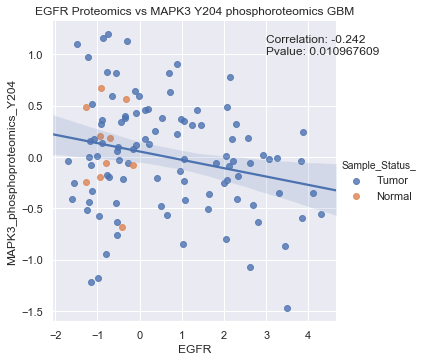

In [31]:
df1 = brain.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["MAPK3"])
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df2 = brain.get_proteomics()
df2 = df2[["EGFR"]]
#df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df3 = df1.merge(df2, on = "Patient_ID")

plot_lin_regression(df3,"EGFR","MAPK3_phosphoproteomics_Y204", "Sample_Status_",title = "EGFR Proteomics vs MAPK3 Y204 phosphoroteomics GBM", ra_stats = True, show_plot = True)

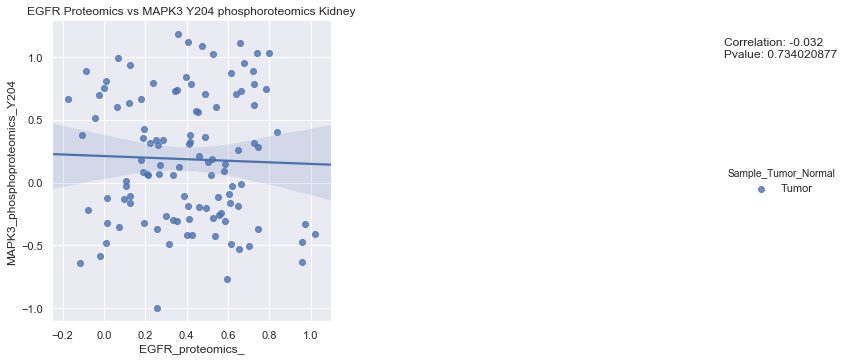

In [102]:
df1 = ccrcc.join_omics_to_omics(df1_name="phosphoproteomics",df2_name="proteomics",
genes1 = ["MAPK3"], genes2= ["EGFR"])
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df1 = df1[["MAPK3_phosphoproteomics_Y204","EGFR_proteomics_"]]
df2 = ccrcc.get_clinical()
df2 = df2[["Sample_Tumor_Normal"]]

df3= pd.concat([df1, df2], axis=1, sort=False)
df3 = df3.loc[df3['Sample_Tumor_Normal'] == "Tumor"]
df3.head(100)
plot_lin_regression(df3,"EGFR_proteomics_","MAPK3_phosphoproteomics_Y204",hue = "Sample_Tumor_Normal", title = "EGFR Proteomics vs MAPK3 Y204 phosphoroteomics Kidney", ra_stats = True, show_plot = True)

In [ ]:
df1 = colon.join_omics_to_omics(df1_name="phosphoproteomics",df2_name="proteomics",
genes1 = ["MAPK3"], genes2= ["EGFR"])
df1.columns = df1.columns.droplevel(2)
#df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df1 = df1[["MAPK3_phosphoproteomics_Y204","EGFR_proteomics_"]]
df2 = colon.get_clinical()
df2 = df2[["Sample_Tumor_Normal"]]

df3= pd.concat([df1, df2], axis=1, sort=False)
df3 = df3.loc[df3['Sample_Tumor_Normal'] == "Tumor"]

df3 = df3.filter(like='EGFR_phosphoproteomics_Y', axis=1)
df3
#plot_lin_regression(df3,"EGFR_proteomics_","MAPK3_phosphoproteomics_Y204",hue = "Sample_Tumor_Normal", title = "EGFR Proteomics vs MAPK3 Y204 phosphoroteomics Colon", ra_stats = True, show_plot = True)

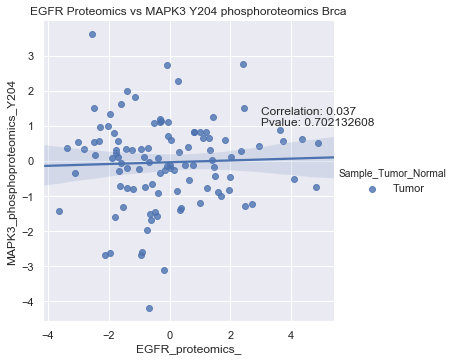

In [116]:
df1 = brca.join_omics_to_omics(df1_name="phosphoproteomics",df2_name="proteomics",
genes1 = ["MAPK3"], genes2= ["EGFR"])
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df1 = df1[["MAPK3_phosphoproteomics_Y204","EGFR_proteomics_"]]
df2 = brca.get_clinical()
df2 = df2[["Sample_Tumor_Normal"]]

df3= pd.concat([df1, df2], axis=1, sort=False)
df3 = df3.loc[df3['Sample_Tumor_Normal'] == "Tumor"]
df3
plot_lin_regression(df3,"EGFR_proteomics_","MAPK3_phosphoproteomics_Y204",hue = "Sample_Tumor_Normal", title = "EGFR Proteomics vs MAPK3 Y204 phosphoroteomics Brca", ra_stats = True, show_plot = True)

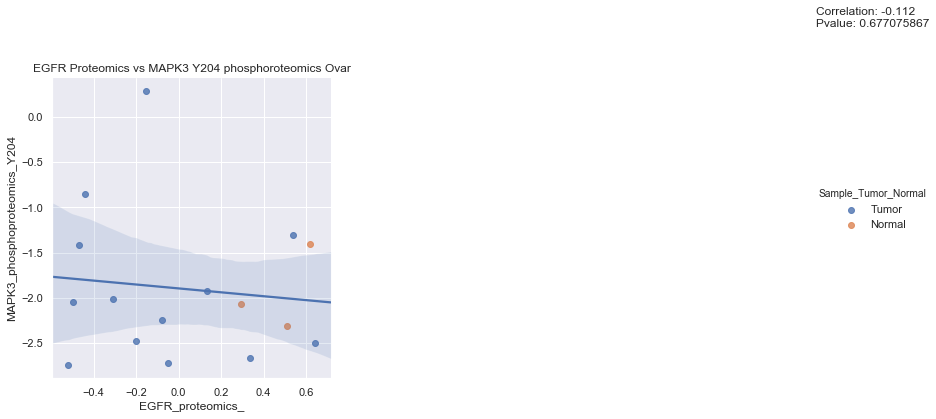

In [121]:
df1 = Ovar.join_omics_to_omics(df1_name="phosphoproteomics",df2_name="proteomics",
genes1 = ["MAPK3"], genes2= ["EGFR"])
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df1 = df1[["MAPK3_phosphoproteomics_Y204","EGFR_proteomics_"]]

df1 = df1.loc[:,~df1.columns.duplicated()]
df2 = Ovar.get_clinical()
df2 = df2[["Sample_Tumor_Normal"]]

df3= pd.concat([df1, df2], axis=1, sort=False)
#df3 = df3.loc[df3['Sample_Tumor_Normal'] == "Tumor"]

plot_lin_regression(df3,"EGFR_proteomics_","MAPK3_phosphoproteomics_Y204",hue = "Sample_Tumor_Normal", title = "EGFR Proteomics vs MAPK3 Y204 phosphoroteomics Ovar", ra_stats = True, show_plot = True)

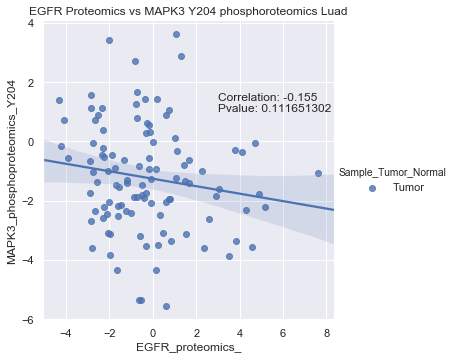

In [124]:
df1 = luad.join_omics_to_omics(df1_name="phosphoproteomics",df2_name="proteomics",
genes1 = ["MAPK3"], genes2= ["EGFR"])
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df1 = df1[["MAPK3_phosphoproteomics_Y204","EGFR_proteomics_"]]

df1 = df1.loc[:,~df1.columns.duplicated()]
df2 = luad.get_clinical()
df2 = df2[["Sample_Tumor_Normal"]]

df3= pd.concat([df1, df2], axis=1, sort=False)
df3 = df3.loc[df3['Sample_Tumor_Normal'] == "Tumor"]

plot_lin_regression(df3,"EGFR_proteomics_","MAPK3_phosphoproteomics_Y204",hue = "Sample_Tumor_Normal", title = "EGFR Proteomics vs MAPK3 Y204 phosphoroteomics Luad", ra_stats = True, show_plot = True)

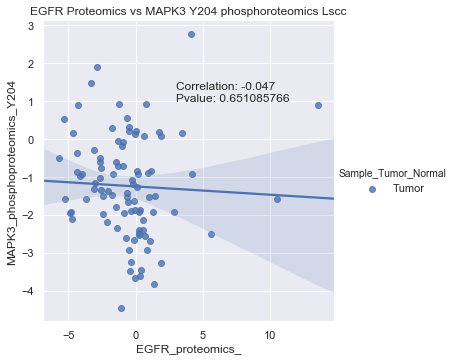

In [127]:
df1 = Lscc.join_omics_to_omics(df1_name="phosphoproteomics",df2_name="proteomics",
genes1 = ["MAPK3"], genes2= ["EGFR"])
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df1 = df1[["MAPK3_phosphoproteomics_Y204","EGFR_proteomics_"]]

df1 = df1.loc[:,~df1.columns.duplicated()]
df2 = Lscc.get_clinical()
df2 = df2[["Sample_Tumor_Normal"]]

df3= pd.concat([df1, df2], axis=1, sort=False)
df3 = df3.loc[df3['Sample_Tumor_Normal'] == "Tumor"]

plot_lin_regression(df3,"EGFR_proteomics_","MAPK3_phosphoproteomics_Y204",hue = "Sample_Tumor_Normal", title = "EGFR Proteomics vs MAPK3 Y204 phosphoroteomics Lscc", ra_stats = True, show_plot = True)

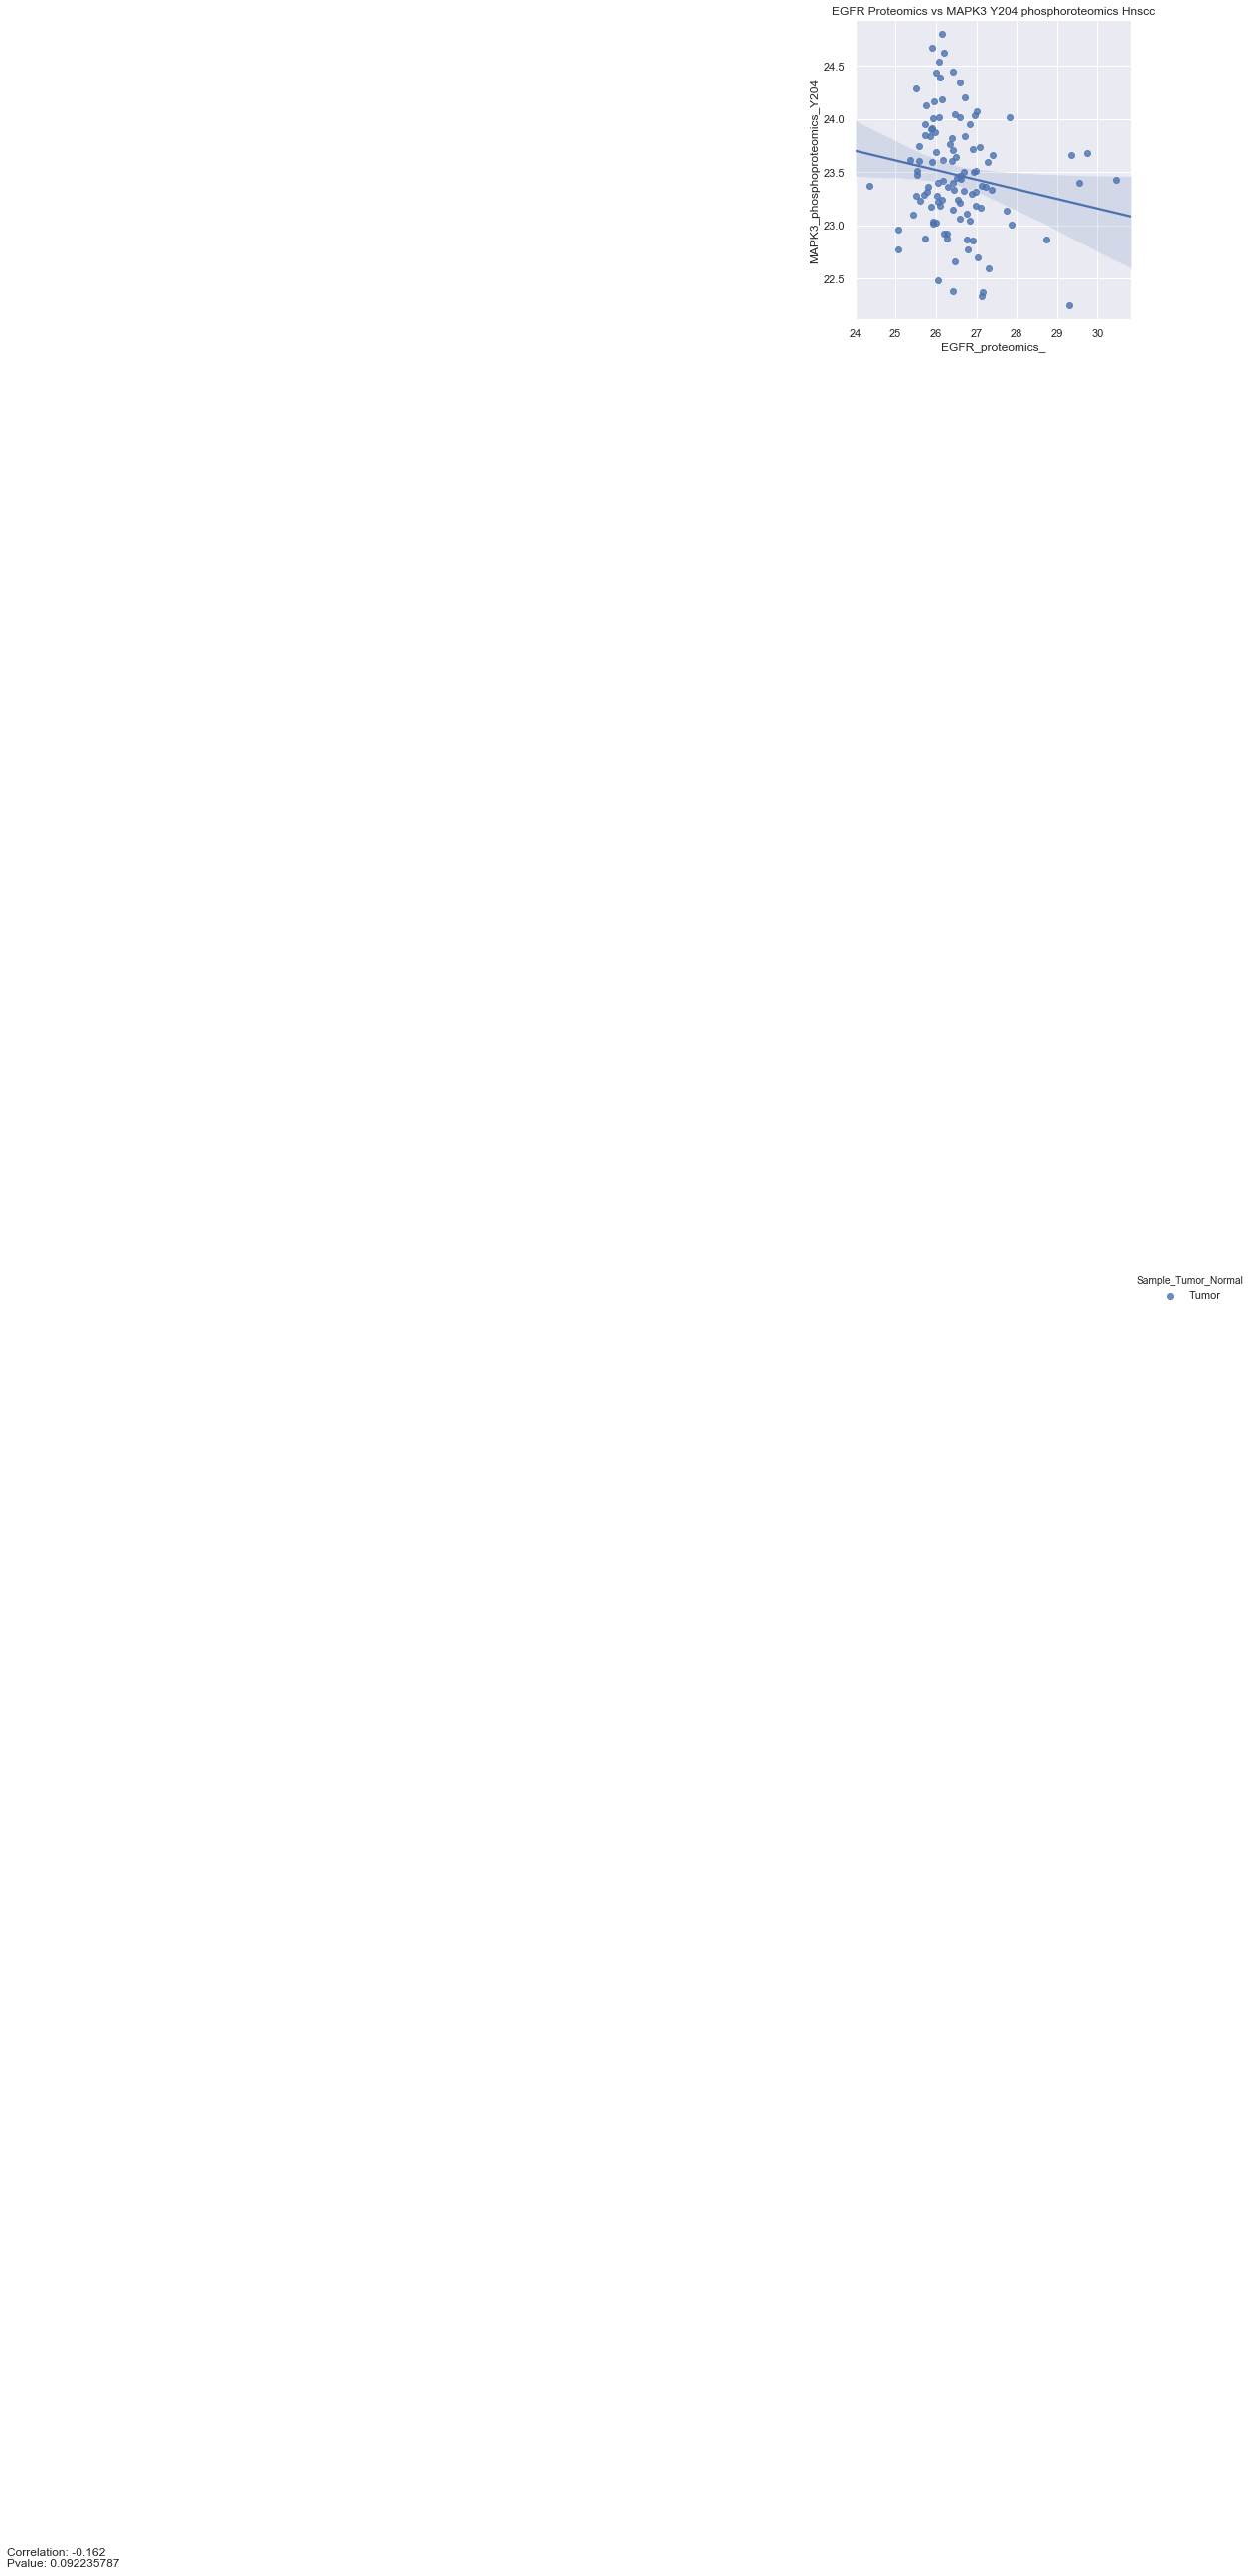

In [130]:
df1 = hnscc.join_omics_to_omics(df1_name="phosphoproteomics",df2_name="proteomics",
genes1 = ["MAPK3"], genes2= ["EGFR"])
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df1 = df1[["MAPK3_phosphoproteomics_Y204","EGFR_proteomics_"]]

df1 = df1.loc[:,~df1.columns.duplicated()]
df2 = hnscc.get_clinical()
df2 = df2[["Sample_Tumor_Normal"]]

df3= pd.concat([df1, df2], axis=1, sort=False)
df3 = df3.loc[df3['Sample_Tumor_Normal'] == "Tumor"]

plot_lin_regression(df3,"EGFR_proteomics_","MAPK3_phosphoproteomics_Y204",hue = "Sample_Tumor_Normal", title = "EGFR Proteomics vs MAPK3 Y204 phosphoroteomics Hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


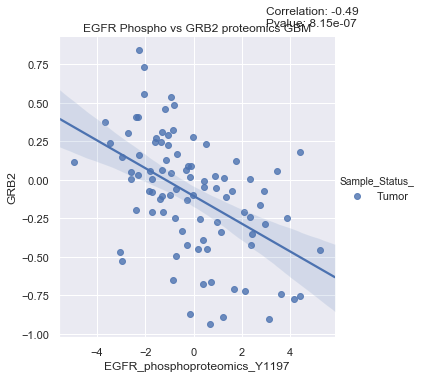

In [19]:
df1 = brain.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["EGFR"])
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df2 = brain.get_proteomics()
df2 = df2[["GRB2"]]
df3 = df1.merge(df2, on = "Patient_ID")

df3 = df3.loc[df3['Sample_Status_'] == "Tumor"]
df3
plot_lin_regression(df3,"EGFR_phosphoproteomics_Y1197","GRB2","Sample_Status_",title = "EGFR Phospho vs GRB2 proteomics GBM", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


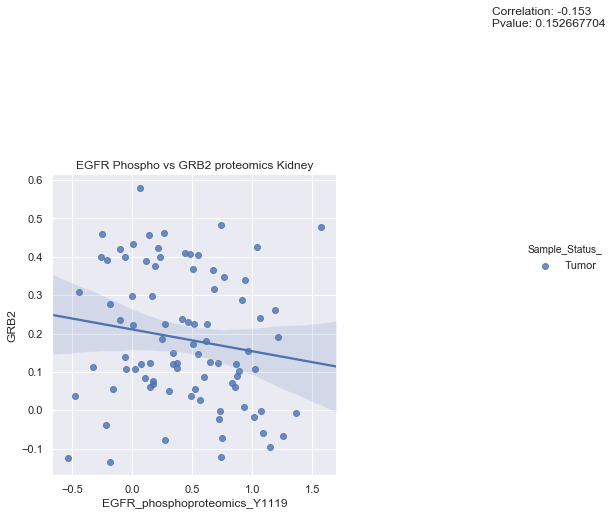

In [41]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["EGFR"])
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df2 = ccrcc.get_proteomics()

df2 = df2[["GRB2"]]

df2.columns = df2.columns.droplevel(1)
df3 = df1.merge(df2, on = "Patient_ID")

df3 = df3.loc[df3['Sample_Status_'] == "Tumor"]

plot_lin_regression(df3,"EGFR_phosphoproteomics_Y1119","GRB2","Sample_Status_",title = "EGFR Phospho vs GRB2 proteomics Kidney", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


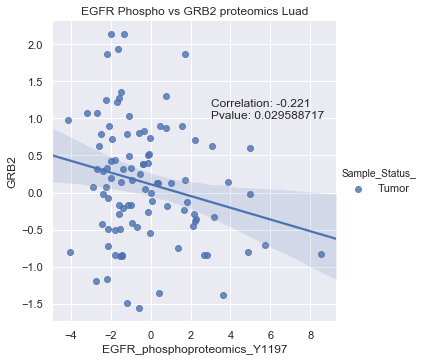

In [31]:
df1 = luad.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["EGFR"])
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df2 = luad.get_proteomics()
df2 = df2[["GRB2"]]

df2.columns = df2.columns.droplevel(1)
df3 = df1.merge(df2, on = "Patient_ID")

df3 = df3.loc[df3['Sample_Status_'] == "Tumor"]

plot_lin_regression(df3,"EGFR_phosphoproteomics_Y1197","GRB2","Sample_Status_",title = "EGFR Phospho vs GRB2 proteomics Luad", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


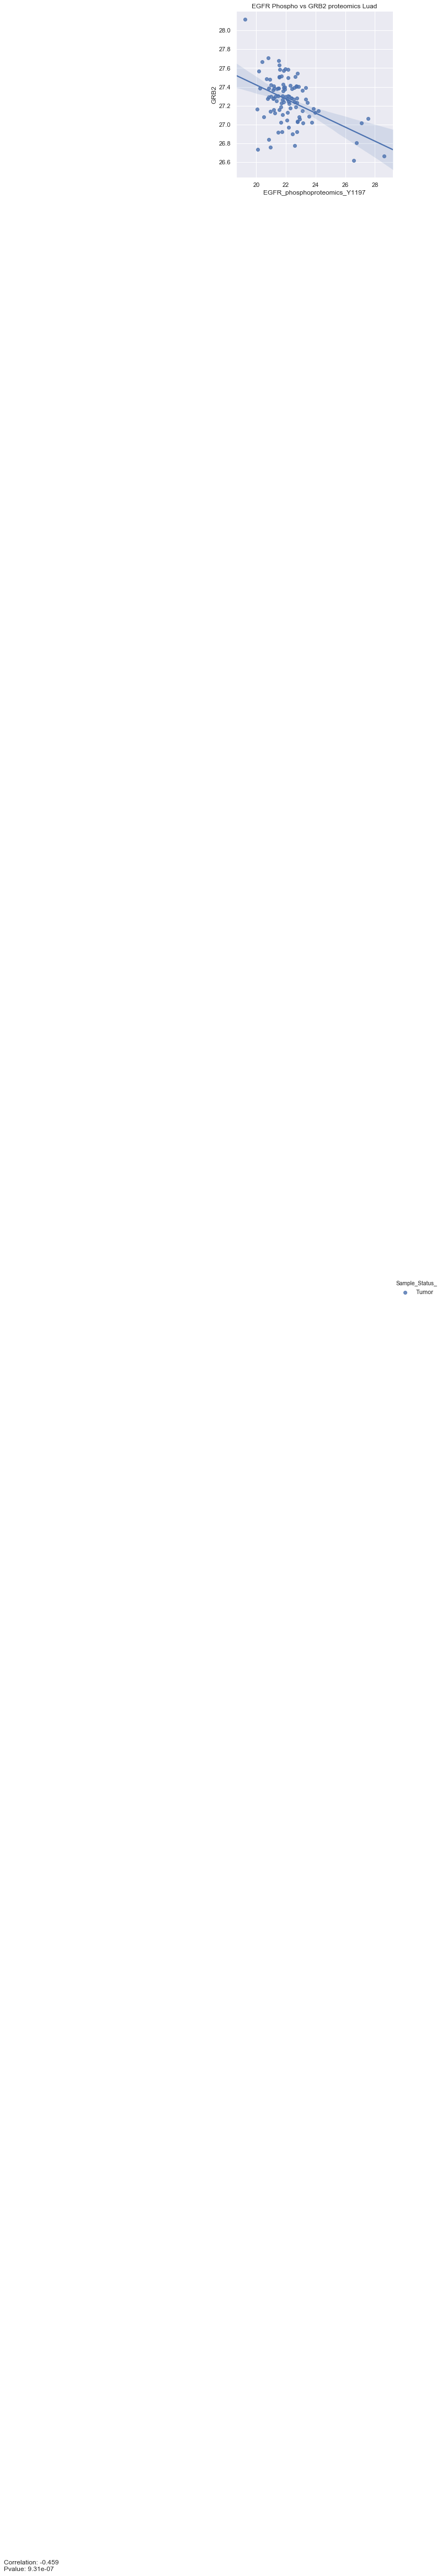

In [45]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="phosphoproteomics", mutations_genes="EGFR",
omics_genes=["EGFR"])
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
df2 = hnscc.get_proteomics()
df2 = df2[["GRB2"]]

#df2.columns = df2.columns.droplevel(1)
df3 = df1.merge(df2, on = "Patient_ID")

df3 = df3.loc[df3['Sample_Status_'] == "Tumor"]

plot_lin_regression(df3,"EGFR_phosphoproteomics_Y1197","GRB2","Sample_Status_",title = "EGFR Phospho vs GRB2 proteomics Luad", ra_stats = True, show_plot = True)